In [1]:
import pandas as pd
import matplotlib as plt 
import seaborn as sns 
import numpy as np

In [2]:
df_merged = pd.read_csv('/Users/pierreloyal/Desktop/Bootcamp CA/us_flight_2023/df_merged.csv')

In [3]:
df_sampled = df_merged.sample(n=800000, random_state=42)

/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_15283/3634579608.py:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, feature] = encoder.fit_transform(X[feature])
/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_15283/3634579608.py:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, feature] = encoder.fit_transform(X[feature])
/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_15283/3634579608.py:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values

Test Accuracy: 80.20%


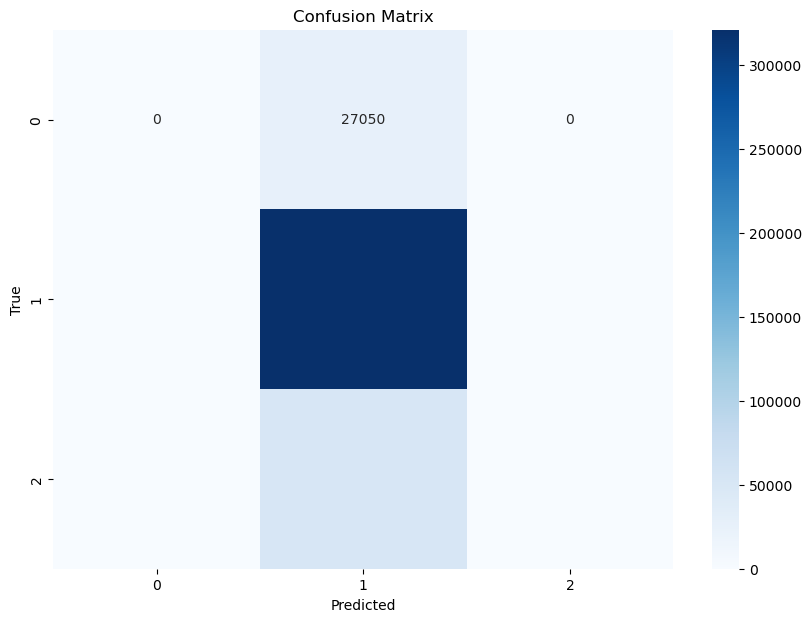

/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     27050
           1       0.80      1.00      0.89    320797
           2       0.00      0.00      0.00     52153

    accuracy                           0.80    400000
   macro avg       0.27      0.33      0.30    400000
weighted avg       0.64      0.80      0.71    400000



/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_sampled is your dataframe and has been loaded
# features and target columns
features = ['Day_Of_Week', 'Month', 'Airline', 'Dep_Airport', 'Arr_Airport', 'DepTime_label', 'Distance_type']
target = 'Dep_Delay_Type'
X = df_sampled[features].copy()
y = df_sampled[target].copy()

# Encoding categorical features
categorical_features = ['Airline', 'Dep_Airport', 'Arr_Airport', 'DepTime_label', 'Distance_type']
encoder = LabelEncoder()
for feature in categorical_features:
    X.loc[:, feature] = encoder.fit_transform(X[feature])
y = encoder.fit_transform(y)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train.loc[:, ['Day_Of_Week', 'Month']] = scaler.fit_transform(X_train[['Day_Of_Week', 'Month']])
X_test.loc[:, ['Day_Of_Week', 'Month']] = scaler.transform(X_test[['Day_Of_Week', 'Month']])

# Create and train the logistic regression model
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))



Low <5min        1604863
Medium >15min     259905
Hight >60min      135232
Name: Dep_Delay_Type, dtype: int64


/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_15283/1825644105.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_undersampled.loc[:, feature] = encoder.fit_transform(X_undersampled[feature])
/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_15283/1825644105.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_undersampled.loc[:, feature] = encoder.fit_transform(X_undersampled[feature])
/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_15283/1825644105.py:38: DeprecationWarning: In a future version, `df.

Test Accuracy: 49.44%


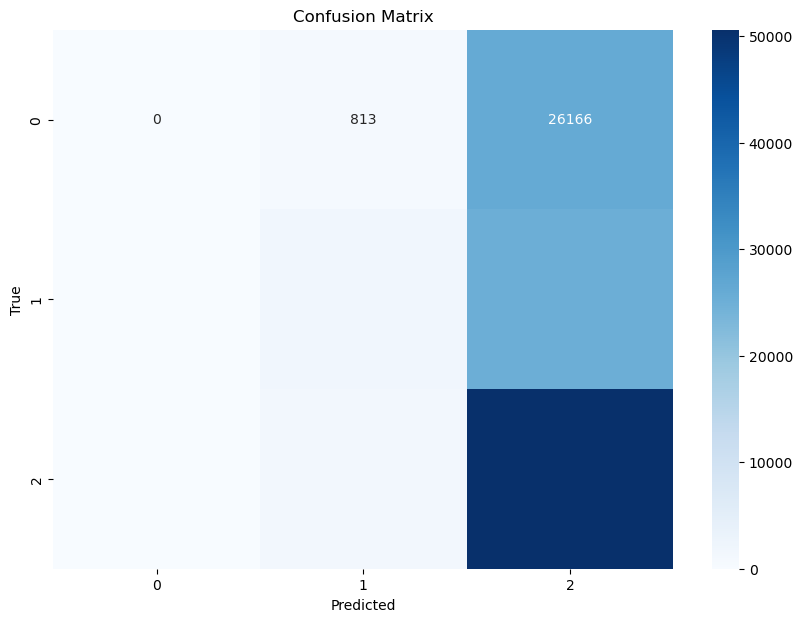

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     26979
           1       0.45      0.07      0.12     27057
           2       0.50      0.97      0.66     52038

    accuracy                           0.49    106074
   macro avg       0.32      0.35      0.26    106074
weighted avg       0.36      0.49      0.35    106074



/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [13]:
from sklearn.utils import resample

# Check the class distribution
class_counts = df_sampled[target].value_counts()
print(class_counts)

# Extracting class labels
low_class_label = class_counts.index[0]  # Assuming 'Low <5min' is the most frequent
medium_class_label = class_counts.index[1]  # Assuming 'Medium >15min' is the second
high_class_label = class_counts.index[2]  # Assuming 'High >60min' is the least frequent

# Ensure there are samples in each class before proceeding
if class_counts[low_class_label] == 0 or class_counts[medium_class_label] == 0 or class_counts[high_class_label] == 0:
    raise ValueError("One of the classes has zero samples, undersampling cannot be performed.")

# Proceed with undersampling the majority class
df_majority = df_sampled[df_sampled[target] == low_class_label]
df_minority_0 = df_sampled[df_sampled[target] == medium_class_label]
df_minority_2 = df_sampled[df_sampled[target] == high_class_label]

# Ensure we have samples to match the smallest minority class
n_samples = min(len(df_minority_0), len(df_minority_2))

df_majority_undersampled = resample(df_majority, 
                                    replace=False,    # sample without replacement
                                    n_samples=n_samples, # to match the smallest minority class
                                    random_state=42)  # reproducible results

# Combine minority classes with undersampled majority class
df_undersampled = pd.concat([df_minority_0, df_minority_2, df_majority_undersampled])

# Features and target
X_undersampled = df_undersampled[features].copy()
y_undersampled = df_undersampled[target].copy()

# Encoding categorical features
for feature in categorical_features:
    X_undersampled.loc[:, feature] = encoder.fit_transform(X_undersampled[feature])
y_undersampled = encoder.fit_transform(y_undersampled)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train.loc[:, ['Day_Of_Week', 'Month']] = scaler.fit_transform(X_train[['Day_Of_Week', 'Month']])
X_test.loc[:, ['Day_Of_Week', 'Month']] = scaler.transform(X_test[['Day_Of_Week', 'Month']])

# Create and train the logistic regression model
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_15283/3070970601.py:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, feature] = encoder.fit_transform(X[feature])
/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_15283/3070970601.py:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, feature] = encoder.fit_transform(X[feature])
/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_15283/3070970601.py:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values

Test Accuracy: 51.03%


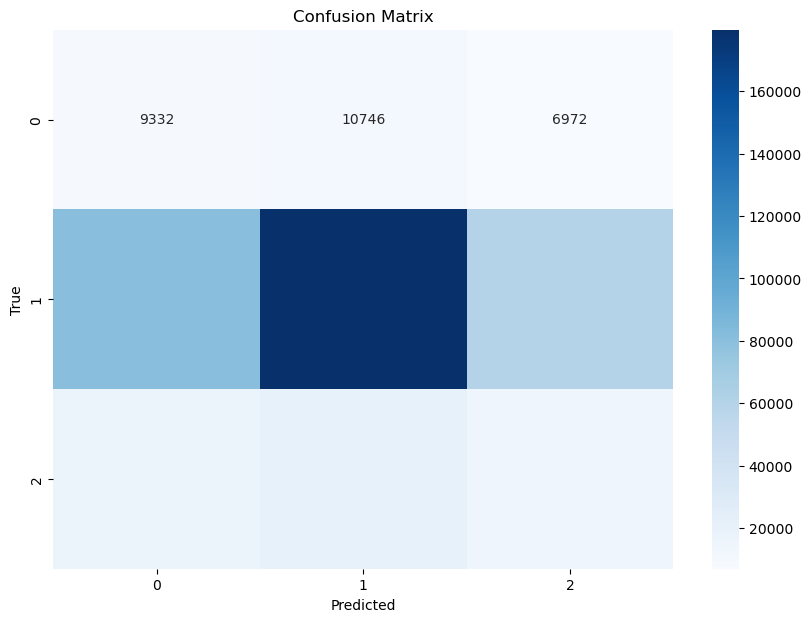

              precision    recall  f1-score   support

           0       0.09      0.34      0.14     27050
           1       0.85      0.56      0.68    320797
           2       0.18      0.29      0.22     52153

    accuracy                           0.51    400000
   macro avg       0.37      0.40      0.35    400000
weighted avg       0.71      0.51      0.58    400000



KeyboardInterrupt: 

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Features and target
X = df_sampled[features].copy()
y = df_sampled[target].copy()

# Encoding categorical features
for feature in categorical_features:
    X.loc[:, feature] = encoder.fit_transform(X[feature])
y = encoder.fit_transform(y)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train.loc[:, ['Day_Of_Week', 'Month']] = scaler.fit_transform(X_train[['Day_Of_Week', 'Month']])
X_test.loc[:, ['Day_Of_Week', 'Month']] = scaler.transform(X_test[['Day_Of_Week', 'Month']])

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create and train the logistic regression model
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# Optionally, try a more complex model like Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf * 100:.2f}%")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_rf))
